In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Optimización Convexa

Para un problema de optimización convexa, un mínimo local es también un mínimo global, se evalúa usando los mismos criterios de primera y segunda derivada.

**Ejemplo de optimización convexa:**

Dada la función $f(x) = \frac{1}{x}+x$, se busca minimizarla para todos los valores de x positivos.

* Calculando el gradiente:
$$\frac{d}{dx}f(x) = -\frac{1}{x^2}+1 = 0$$

Esta igualdad solo admite una solución posible que es x = 1, por tanto debe ser un mínimo global.

* Calculando el Hessiano:
$$\frac{d^2}{dx^2}f(x) = \frac{2}{x^3}$$

Como la función tiene un dominio para los x positivos, entonces el Hessiano es siempre positivo, por tanto se satisface la condición de segundo orden. 

* Evaluando la estabilidad:

Para evaluar estabilidad alrededor del punto x, minimizar $f(x) - px$ calculando el gradiente:
$$\frac{d}{dx}(f(x) - px) = -\frac{1}{x^2}+1+p = 0$$

Para valores de p muy pequeños la única solución posible sería:

$$x^*(p) = \frac{1}{\sqrt{1+p}}$$

Calculando la diferencia:

$$|x^*(0) - x^*(p)| = \frac{|\sqrt{1+p}-1|}{\sqrt{1+p}} <= C*p$$

In [2]:
# Comparando la igualdad de x sin perturbación y x con perturbación
x = sym.symbols('x',real = True,positive = True)
fx = 1/x + x
grad_x = fx.diff(x)
hessian = grad_x.diff(x)
x0 = sym.solve(grad_x)
x0

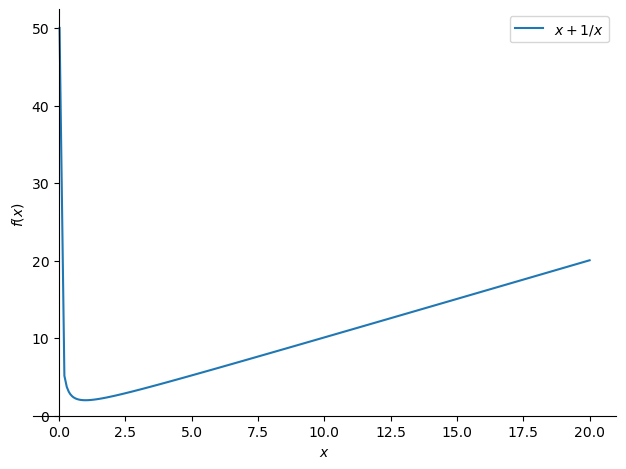

In [3]:
sym.plot(fx,(x,0.02,20),legend=['f(x)'])

In [4]:
p = np.random.randn()/10
x0_p = sym.solve(grad_x+p)
x0_p,   p

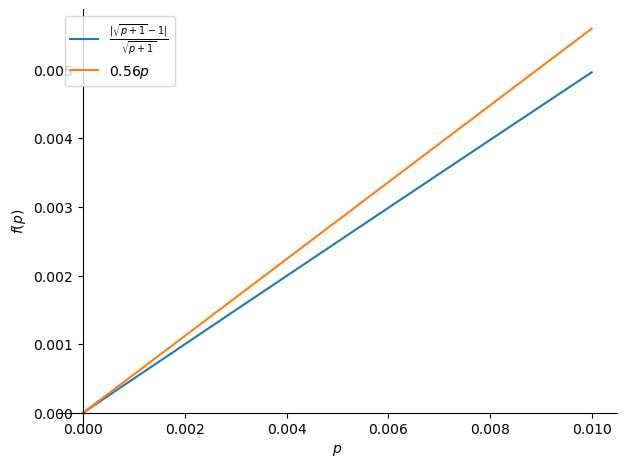

In [8]:
# Comparando la igualdad de x sin perturbación y x con perturbación
p = sym.symbols('p',real = True,positive = True)
f1 = sym.Abs(sym.sqrt(1+p)-1)/sym.sqrt(1+p)
f2 = sym.Abs(p)
C = 0.56
sym.plot(f1,C*f2,(p,0,0.01),legend=['f1','Cp'])